# Openness and shear failure

We analyse the relationship between the openness and the shear failure proxy : $\tau/\tau_c$. <br>
The critical shear failure $\tau_c$ is calculated as : $\tau_c=\mu*\sigma_n+c$ with $c$ and $\mu$, the failure parameters measured from tests on sealed fractures (Glamheden, 2007). <br> Our analysis consists in separating the dataset in different groups:
- by orientations
- by depths 
- by deformation zones or fracture domaines

### Python packages and functions

In [24]:
import sys, os, math, numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path=r'python_functions'
sys.path.append(path)

import utils_fop as uF #functions to calculate openness

### Retrieve Forsmark fracture dataset, with stresses calculated in previous notebook

In [25]:
input_folder = r'input_data'
filename = 'p_frac_core_select_with_stresses'
all_data = pd.read_csv(os.path.join(input_folder,filename+str('.txt')), sep = '\t')

### Compute Shear failure proxy (ratio of shear stress and critical shear stress)

In [26]:
#Sealed fracture parameters
_mu_s = 1.33
_c_s = 4

# critical shear stress
tau_c = _mu_s*all_data['norm_stress']+_c_s

# shear proxy
all_data['shear_proxy'] = all_data['tan_stress']/tau_c



### Binning properties

In [27]:
#var='tan_stress' #(if you want shear stress only)
var='shear_proxy'

bin_number=30 # number of bins
min_number=100 # minimum number of data

if var=='shear_proxy':
    xlabel='$\u03C4/\u03C4_c$'
    bin_min = 0
    bin_max = 1
else:
    xlabel='$\u03C4$ (MPa)'
    bin_min = 0
    bin_max = 15 

## 1) Analysis with different orientations groups

### Orientation groups and plot properties 

In [28]:
angle= [(0,90),(0,20),(20,65),(65,90)]
name = ['All','Horizontal (0-20)', 'Intermediate (20-65)', 'Vertical (65-90)']
color = ['black','crimson', 'darkblue', 'green']
lineWidth = [3,1.5,1.5,1.5]
z_order = [40,30,20,10]

### Compute openness in bin of $\tau/\tau_c$ and plot

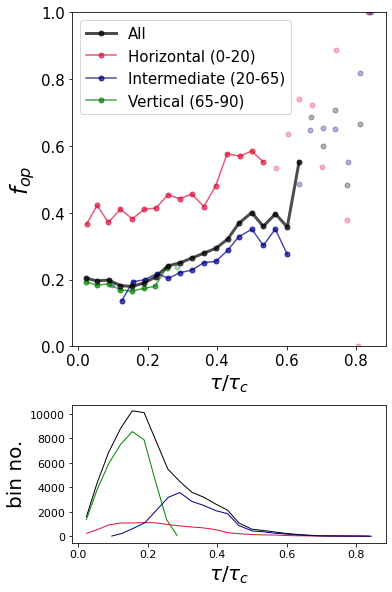

In [29]:
fig = plt.figure()
ax = plt.subplot2grid((3, 1), (0, 0), rowspan = 2) 
ax2 = plt.subplot2grid((3, 1), (2, 0), rowspan = 1)

    # loop over orientation groups
for i,_angle in enumerate(angle):
    _name=name[i]
    
    # select data by orientation group
    dataframe_a=all_data.loc[(all_data['DIP(degrees)'] <= angle[i][1]) & (all_data['DIP(degrees)'] >=  angle[i][0])].copy()
    
    # compute openness in bins of normal stress
    analysis = uF.fop(dataframe_a,var,bin_number=bin_number, min=bin_min, max = bin_max)
    
    #select bins with low number of data (N)
    data_valid= analysis.loc[analysis['N']>=min_number]
    data_nvalid=analysis.loc[analysis['N']< min_number]
    
    # plot openness
    ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, color = color[i], linewidth = lineWidth[i], zorder = z_order[i], label = _name)
    ax.plot(data_nvalid[var], data_nvalid['fop32'], linestyle = '', marker='o', markersize = 5, alpha=0.3, color = color[i]) 
    # plot data number N per bin
    ax2.plot(analysis[var], analysis['N'], linestyle = '-', color = color[i], linewidth = 1, label = _name)

# format graph

ax.set_xlabel(xlabel, fontsize = 20)
ax.set_ylabel('$f_{op}$', fontsize = 23)
ax2.set_xlabel(xlabel, fontsize = 20)
ax2.set_ylabel('bin no.', fontsize = 20)
ax.legend(fontsize = 15)
ax.set_ylim(0,1)
ax.tick_params(labelsize = 15)
ax2.tick_params(labelsize = 11)

fig.set_tight_layout(True)
fig.set_size_inches(400./fig.dpi,600./fig.dpi)
plt.show()

#save figure
file_path = os.path.join('output_figures', var+'_by_orientations')
fig.savefig(file_path)
fig.clf()

## 2) Analysis with different depth groups

In [30]:
#---depth groups and plot properties
depth_bins = [0,150,300,400,600,1000]
name = ['0-150 m','150-300 m', '300-400 m', '400-600 m', '600-1000 m']
z_order = [40,30,20,10]

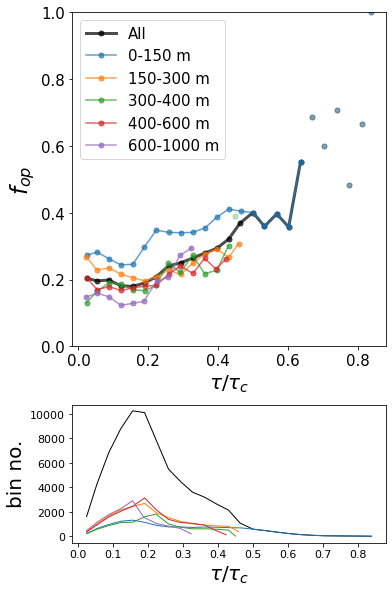

In [31]:
#---plot
fig = plt.figure()
ax = plt.subplot2grid((3, 1), (0, 0), rowspan = 2) 
ax2 = plt.subplot2grid((3, 1), (2, 0), rowspan = 1)
    
#all depths
analysis = uF.fop(all_data,var,bin_number=bin_number, min=bin_min, max = bin_max)
data_valid= analysis.loc[analysis['N']>=min_number]
data_nvalid=analysis.loc[analysis['N']< min_number]
ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, color = 'black', linewidth = 3, label = 'All')
ax.plot(data_nvalid[var], data_nvalid['fop32'], linestyle = '', marker='o', markersize = 5, alpha=0.3, color = 'black') 
ax2.plot(analysis[var], analysis['N'], linestyle = '-', color = 'black', linewidth = 1, label = 'All')

    #by depth group
for i,_depth in enumerate(depth_bins[:-1]):
    _name=name[i]
    color = plt.cm.tab10(i)
    # select depth group
    dataframe_a=all_data.loc[(-all_data['ELEVATION_ADJUSTEDSECUP'] <= depth_bins[i+1]) & (-all_data['ELEVATION_ADJUSTEDSECUP'] >=  depth_bins[i])].copy()
    
    analysis = uF.fop(dataframe_a,var,bin_number=bin_number, min=bin_min, max = bin_max)
        
    data_valid= analysis.loc[analysis['N']>=min_number]
    data_nvalid=analysis.loc[analysis['N']< min_number]
    ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, linewidth = 1.5, label = _name, color = color)
    ax.plot(data_nvalid[var], data_nvalid['fop32'], linestyle = '', marker='o', markersize = 5, alpha=0.3, linewidth = 0.5, color = color) 
    ax2.plot(analysis[var], analysis['N'], linestyle = '-', linewidth = 1, label = _name)
    
#format graph
ax.set_xlabel(xlabel, fontsize = 20)
ax.set_ylabel('$f_{op}$', fontsize = 23)
ax2.set_xlabel(xlabel, fontsize = 20)
ax2.set_ylabel('bin no.', fontsize = 20)
ax.legend(fontsize = 15)
ax.set_ylim(0,1)
ax.tick_params(labelsize = 15)
ax2.tick_params(labelsize = 11)

fig.set_tight_layout(True)
fig.set_size_inches(400./fig.dpi,600./fig.dpi)
plt.show()

#save figure
file_path = os.path.join('output_figures', var+'_by_depth')
fig.savefig(file_path)
fig.clf()

## 3) Analysis by differencing fracture domains and deformation zones

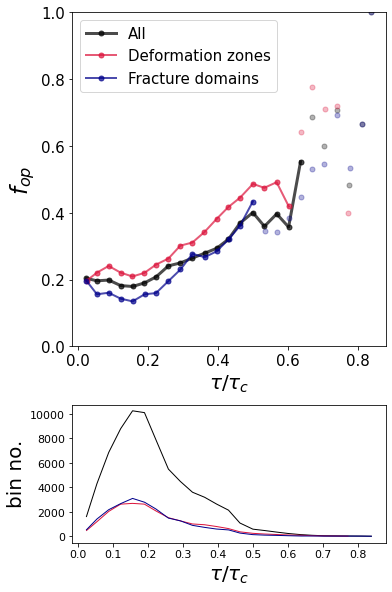

In [33]:
bin_number=30 # number of bins
min_number=100 # minimum number of data

#---plot
fig = plt.figure()
ax = plt.subplot2grid((3, 1), (0, 0), rowspan = 2) 
ax2 = plt.subplot2grid((3, 1), (2, 0), rowspan = 1)

#all fractures
analysis = uF.fop(all_data,var,bin_number=bin_number, min=bin_min, max = bin_max)
data_valid= analysis.loc[analysis['N']>=min_number]
data_nvalid=analysis.loc[analysis['N']< min_number]
ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, color = 'black', linewidth = 3, label = 'All')
ax.plot(data_nvalid[var], data_nvalid['fop32'], linestyle = '', marker='o', markersize = 5, alpha=0.3, color = 'black')
ax2.plot(analysis[var], analysis['N'], linestyle = '-', color = 'black', linewidth = 1, label = 'All')

#Deformation Zones fractures
dz_data = all_data.loc[all_data['DEFORMATION_ZONE'].notnull()]
analysis = uF.fop(dz_data,var,bin_number=bin_number, min=bin_min, max = bin_max)
data_valid= analysis.loc[analysis['N']>=min_number]
data_nvalid=analysis.loc[analysis['N']< min_number]
ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, color = 'crimson', linewidth = 2, label = 'Deformation zones')
ax.plot(data_nvalid[var], data_nvalid['fop32'], linestyle = '', marker='o', markersize = 5, alpha=0.3, color = 'crimson') 
ax2.plot(analysis[var], analysis['N'], linestyle = '-', color = 'crimson', linewidth = 1, label = 'Deformation zones')

    #Fracture domains
ffm_data = all_data.loc[all_data['FRACTURE_DOMAIN'].isin(['FFM01', 'FFM02', 'FFM03', 'FFM04', 'FFM05', 'FFM06'])]
analysis = uF.fop(ffm_data,var,bin_number=bin_number, min=bin_min, max = bin_max)
data_valid= analysis.loc[analysis['N']>=min_number]
data_nvalid=analysis.loc[analysis['N']< min_number]
ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, color = 'darkblue', linewidth = 2, label = 'Fracture domains')
ax.plot(data_nvalid[var], data_nvalid['fop32'], linestyle = '', marker='o', markersize = 5, alpha=0.3, color = 'darkblue') 
ax2.plot(analysis[var], analysis['N'], linestyle = '-', color = 'darkblue', linewidth = 1, label = 'Fracture domains')
    
#format graph
ax.set_xlabel(xlabel, fontsize = 20)
ax.set_ylabel('$f_{op}$', fontsize = 23)
ax2.set_xlabel(xlabel, fontsize = 20)
ax2.set_ylabel('bin no.', fontsize = 20)
ax.legend(fontsize = 15)
ax.set_ylim(0,1)

ax.tick_params(labelsize = 15)
ax2.tick_params(labelsize = 11)

fig.set_tight_layout(True)
fig.set_size_inches(400./fig.dpi,600./fig.dpi)
plt.show()

#save figure
file_path = os.path.join('output_figures', var+'_by_ffm_dz')
fig.savefig(file_path)
fig.clf()